# Bayesian Linear Regression

<img src="img/BLR_Equations.PNG" width="700">

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

## Generated Data

In [2]:
def noise(function, sigma):
    def function_with_noise(*args):
        y = function(*args)
        noise = np.random.normal(0, sigma, 1)
        return y + noise
    return function_with_noise

In [3]:
def polynomial(x, degrees):
    y = sum(degrees[i]*(x**i) for i in range(len(degrees)))
    return y

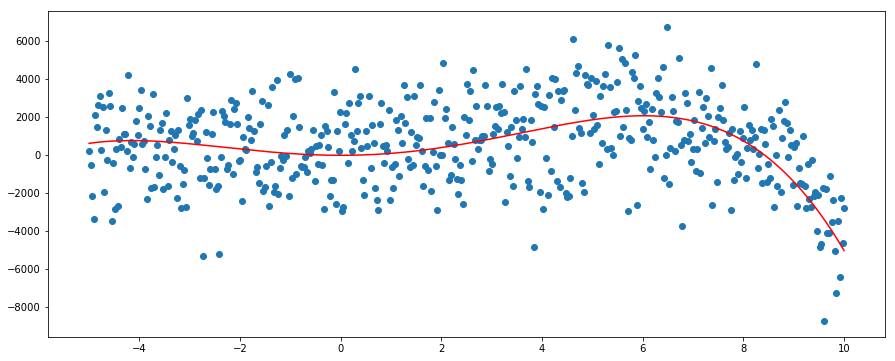

In [4]:
x = np.linspace(-5, 10, 500)

degrees = (0, -1, 100, 5, -2)
y = np.array([noise(polynomial, sigma=2000)(x_i, degrees) for x_i in x])

plt.figure(figsize=(15,6))
plt.plot(x, [polynomial(x_i, degrees) for x_i in x], color='red')
plt.scatter(x, y)
plt.show()

In [5]:
sigma_sqr = np.var(y)
alpha_sqr = 2000**2

In [6]:
Phi = np.column_stack([np.ones(len(x)), x, x**2, x**3, x**5, x**6, x**7])
Phi.shape

(500, 7)

In [7]:
I = np.identity(Phi.shape[1])
V_n = np.linalg.inv((1/alpha_sqr) * I + (1/sigma_sqr) * np.dot(Phi.T, Phi))
V_n

array([[  4.05306988e+04,  -7.97006294e+03,  -4.56797921e+03,
          1.39407963e+03,  -4.26628297e+01,   5.63333982e+00,
         -2.27191006e-01],
       [ -7.97006294e+03,   1.54184518e+04,   2.05988886e+03,
         -1.64219562e+03,   4.33962562e+01,  -3.49237081e+00,
          4.23334337e-02],
       [ -4.56797921e+03,   2.05988886e+03,   9.71469829e+02,
         -3.87086135e+02,   1.26864582e+01,  -1.58867451e+00,
          5.94666834e-02],
       [  1.39407963e+03,  -1.64219562e+03,  -3.87086135e+02,
          2.39503981e+02,  -7.33213934e+00,   7.32866726e-01,
         -1.83025366e-02],
       [ -4.26628297e+01,   4.33962562e+01,   1.26864582e+01,
         -7.33213934e+00,   2.41799607e-01,  -2.61692650e-02,
          7.59188749e-04],
       [  5.63333982e+00,  -3.49237081e+00,  -1.58867451e+00,
          7.32866726e-01,  -2.61692650e-02,   3.27200152e-03,
         -1.19954992e-04],
       [ -2.27191006e-01,   4.23334337e-02,   5.94666834e-02,
         -1.83025366e-02,   7.59

In [8]:
m = (1/sigma_sqr) * np.dot(np.dot(V_n, Phi.T), y)
m

array([[  3.72805021e+02],
       [  1.40494503e+02],
       [  3.68850731e+01],
       [ -1.90235135e+00],
       [  4.28504121e-02],
       [ -1.50055033e-02],
       [  2.52828396e-04]])

In [9]:
M = np.dot(Phi, m)
M.shape

(500, 1)

In [10]:
big_sigma = (1/sigma_sqr) * np.identity(Phi.shape[0]) + np.dot(np.dot(Phi, V_n), Phi.T)
big_sigma.shape

(500, 500)

<img src="img/GaussianProperties.PNG" width="700">

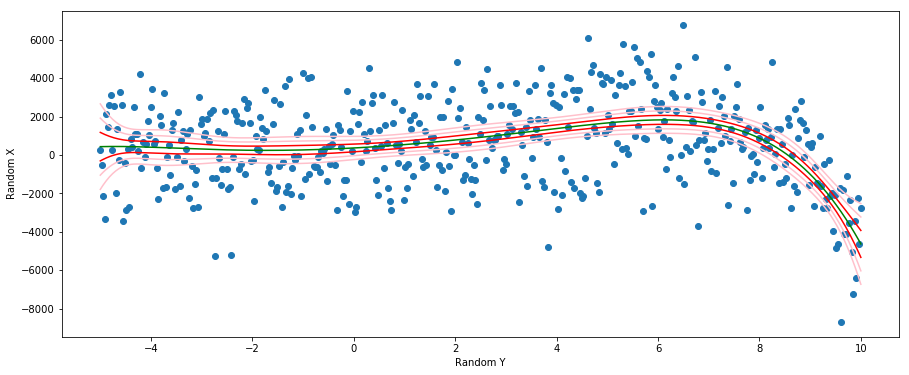

In [11]:
# Y distribuye N(M, Sigma)
# El valor más probable, es M

plt.figure(figsize=(15,6))
plt.scatter(x, y)
plt.plot(x, M.T[0], color='green')

plt.plot(x, [M.T[0][i] + 1*(big_sigma[i][i]**0.5) for i in range(500)], color='red')
plt.plot(x, [M.T[0][i] - 1*(big_sigma[i][i]**0.5) for i in range(500)], color='red')
plt.plot(x, [M.T[0][i] + 2*(big_sigma[i][i]**0.5) for i in range(500)], color='pink')
plt.plot(x, [M.T[0][i] - 2*(big_sigma[i][i]**0.5) for i in range(500)], color='pink')
plt.plot(x, [M.T[0][i] + 3*(big_sigma[i][i]**0.5) for i in range(500)], color='pink')
plt.plot(x, [M.T[0][i] - 3*(big_sigma[i][i]**0.5) for i in range(500)], color='pink')


plt.xlabel('Random Y')
plt.ylabel('Random X')

plt.show()

In [12]:
np.mean(np.diag(big_sigma)**0.5)

249.1583540954114

In [13]:
np.std(y)

2216.4067519616356

El valor de la desviación estándar es muy bajo, tomando en cuenta que los datos estan en una escala de miles

In [23]:
norm.cdf(M.T[0][0] + 3*big_sigma[0][0]**0.5, loc=M.T[0][0], scale=big_sigma[0][0]**0.5)

0.9986501019683699

En una distribución normal, si se toma el valor de la media +- 3 desviaciones estandar, entonces ya se tiene una probabilidad mayor a 0.99 de que el valor se encuentre en ese intervalo.

## Astronomical Data & Gaussian Kernel

In [24]:
train = pd.read_csv('planet_OGLE_Train.dat', sep=",", header=0)
test = pd.read_csv('planet_OGLE_Test.dat', sep=",", header=0)
frames = [train, test]
data = pd.concat(frames)
data.head()

,Days,Mag,error
0,2.452073e+06,15.651,0.008
1,2.452073e+06,15.646,0.008
2,2.452073e+06,15.643,0.008
3,2.452073e+06,15.650,0.008
4,2.452073e+06,15.658,0.008


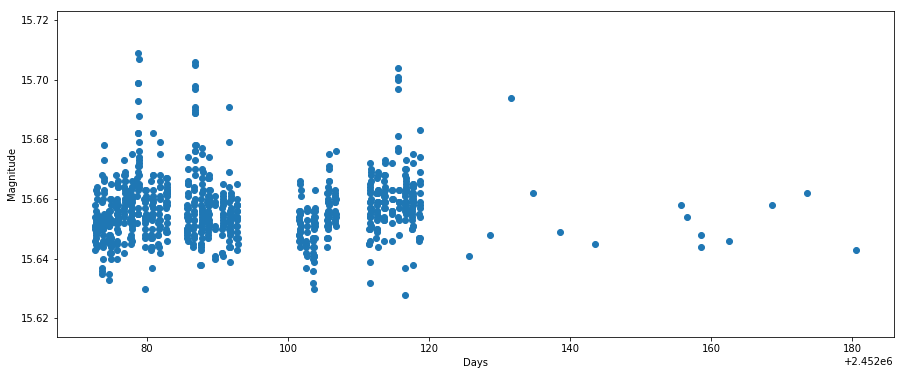

In [25]:
plt.figure(figsize=(15, 6))
plt.scatter(data['Days'], data['Mag'])

plt.xlabel('Days')
plt.ylabel('Magnitude')

plt.show()

In [26]:
max_x = max(data['Days'])
min_x = min(data['Days'])
x_range = max_x - min_x

max_y = max(data['Mag'])
min_y = min(data['Mag'])
y_range = max_y - min_y
            
x_norm = (data['Days'] - min_x) / x_range
y_norm = (data['Mag'] - min_y) / y_range

In [38]:
def normal_pdf(x, mu, alpha):  # x y mu pueden ser vectores
    return np.exp(-0.5*((x-mu)/alpha)**2)
    

def gaussian_kernel(x, size=25):
    alpha = (max(x) - min(x))/30  # ¿Cómo determinar un alpha?
    mu = np.random.choice(x, size=size)
    
    columns = [[normal_pdf(x_i, mu_i, alpha) for x_i in x] for mu_i in mu]
    Phi = np.column_stack([np.ones(len(x))] + columns)

    return Phi


def polynomial_kernel(x, polynomial_degree):
    Phi = np.column_stack([x**i for i in range(polynomial_degree + 1)])
    return Phi

def bayesian_regression(Phi, y, sigma_sqr=1, alpha_sqr=2):  # ¿Cual es el efecto de estos parámetros?
    I = np.identity(Phi.shape[1])  # 4x4
    V_n = np.linalg.inv((1/alpha_sqr) * I + (1/sigma_sqr) * np.dot(Phi.T, Phi))  # (4x4) + (4x8 dot 8x4)
    
    m = (1/sigma_sqr) * np.dot(np.dot(V_n, Phi.T), y)
    M = np.dot(Phi, m)
    big_sigma = (1/sigma_sqr) * np.identity(Phi.shape[0]) + np.dot(np.dot(Phi, V_n), Phi.T)
    

    return M, big_sigma

In [39]:
Phi_astro = gaussian_kernel(x_norm)
M_astro, big_sigma_astro = bayesian_regression(Phi_astro, y_norm, sigma_sqr=1)

In [40]:
np.std(y_norm)

0.13376879247261925

In [41]:
M_astro.shape, big_sigma.shape

((800,), (500, 500))

In [42]:
def distance_from_mean(mean, var, confidence):
    P = 0.5 - confidence / 2
    inf_limit = norm.ppf(P, loc=mean, scale=var)
    distance = mean - inf_limit
    return distance

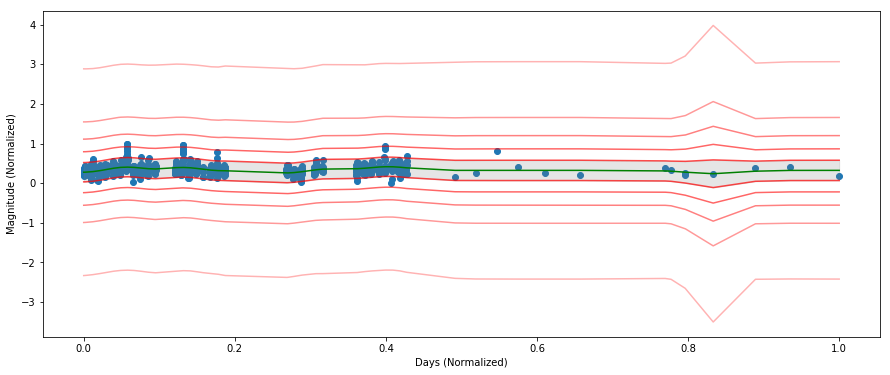

In [43]:
# Y distribuye N(M, Sigma)
# El valor más probable, es M

plt.figure(figsize=(15,6))
plt.scatter(x_norm, y_norm)
plt.plot(x_norm, M_astro, color='green')

d1 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.19) for i in range(len(M_astro))]
d2 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.39) for i in range(len(M_astro))]
d3 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.59) for i in range(len(M_astro))]
d4 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.79) for i in range(len(M_astro))]
d5 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.99) for i in range(len(M_astro))]

a = 0.7
plt.plot(x_norm, M_astro + d1, color='red', alpha=a)
plt.plot(x_norm, M_astro - d1, color='red', alpha=a)
plt.plot(x_norm, M_astro + d2, color='red', alpha=a - 0.1)
plt.plot(x_norm, M_astro - d2, color='red', alpha=a - 0.1)
plt.plot(x_norm, M_astro + d3, color='red', alpha=a - 0.2)
plt.plot(x_norm, M_astro - d3, color='red', alpha=a - 0.2)
plt.plot(x_norm, M_astro + d4, color='red', alpha=a - 0.3)
plt.plot(x_norm, M_astro - d4, color='red', alpha=a - 0.3)
plt.plot(x_norm, M_astro + d5, color='red', alpha=a - 0.4)
plt.plot(x_norm, M_astro - d5, color='red', alpha=a - 0.4)

plt.fill_between(x_norm, M_astro + d1, M_astro - d1, color='grey', alpha='0.2')

plt.xlabel('Days (Normalized)')
plt.ylabel('Magnitude (Normalized)')
 
plt.show()

Los datos quedan en su mayoría dentro del intervalo de confianza de un 20%. 

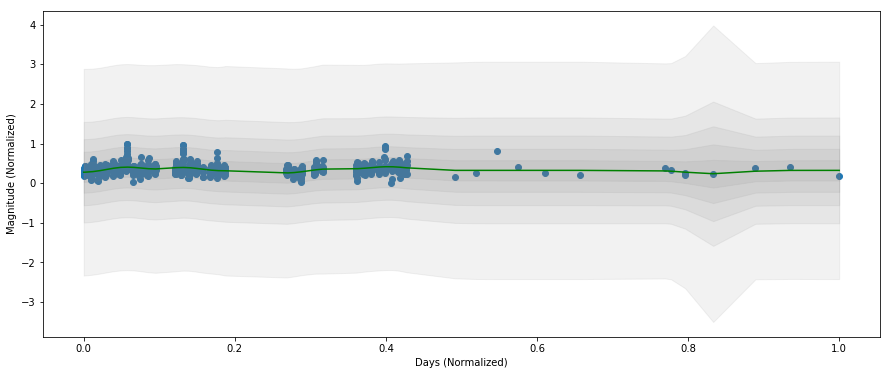

In [44]:
# Y distribuye N(M, Sigma)
# El valor más probable, es M

plt.figure(figsize=(15,6))
plt.scatter(x_norm, y_norm)
plt.plot(x_norm, M_astro, color='green')

d1 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.19) for i in range(len(M_astro))]
d2 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.39) for i in range(len(M_astro))]
d3 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.59) for i in range(len(M_astro))]
d4 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.79) for i in range(len(M_astro))]
d5 = [distance_from_mean(M_astro[i], big_sigma_astro[i][i], 0.99) for i in range(len(M_astro))]

plt.fill_between(x_norm, M_astro + d1, M_astro - d1, color='grey', alpha='0.1')
plt.fill_between(x_norm, M_astro + d2, M_astro - d2, color='grey', alpha='0.1')
plt.fill_between(x_norm, M_astro + d3, M_astro - d3, color='grey', alpha='0.1')
plt.fill_between(x_norm, M_astro + d4, M_astro - d4, color='grey', alpha='0.1')
plt.fill_between(x_norm, M_astro + d5, M_astro - d5, color='grey', alpha='0.1')


plt.xlabel('Days (Normalized)')
plt.ylabel('Magnitude (Normalized)')

plt.show()

**¿Cómo influye el valor de sigma cuadrado en la predicción?**

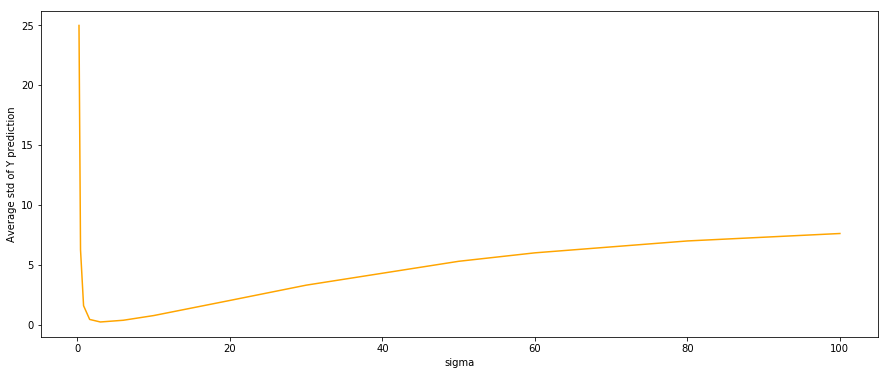

In [45]:
sigmas = [0.2, 0.4, 0.8, 1.6, 3, 6, 10, 20, 30, 50, 60, 80, 100]
sigmas_of_prediction = []

for s in sigmas:
    M_s, big_sigma_s = bayesian_regression(Phi_astro, y_norm, sigma_sqr=s**2)
    mean_deviation = np.mean(np.diag(big_sigma_s))
    sigmas_of_prediction.append(mean_deviation)

plt.figure(figsize=(15, 6))
plt.plot(sigmas, sigmas_of_prediction, color='orange')

plt.xlabel('sigma')
plt.ylabel('Average std of Y prediction')

plt.show()

Es posible ver, que a medida de que se disminuye la varianza que se asume de la naturaleza de los datos, aumenta de manera explosiva la varianza de la predicción. No debiese ser al revés??? Una posible explicación a esto es que, cuando sigma es muy bajo, las ecuaciones del modelo empiezan a gobernarse solo por la matriz Phi.

In [46]:
np.diag(np.dot(Phi, Phi.T))

array([  6.35743815e+09,   5.84570133e+09,   5.37245471e+09,
         4.93500903e+09,   4.53084840e+09,   4.15762001e+09,
         3.81312450e+09,   3.49530677e+09,   3.20224735e+09,
         2.93215420e+09,   2.68335498e+09,   2.45428969e+09,
         2.24350381e+09,   2.04964177e+09,   1.87144076e+09,
         1.70772494e+09,   1.55739994e+09,   1.41944773e+09,
         1.29292171e+09,   1.17694213e+09,   1.07069176e+09,
         9.73411862e+08,   8.84398302e+08,   8.02997989e+08,
         7.28605472e+08,   6.60659760e+08,   5.98641334e+08,
         5.42069337e+08,   4.90498940e+08,   4.43518869e+08,
         4.00749087e+08,   3.61838619e+08,   3.26463519e+08,
         2.94324958e+08,   2.65147446e+08,   2.38677157e+08,
         2.14680370e+08,   1.92942008e+08,   1.73264278e+08,
         1.55465394e+08,   1.39378394e+08,   1.24850028e+08,
         1.11739729e+08,   9.99186467e+07,   8.92687566e+07,
         7.96820232e+07,   7.10596253e+07,   6.33112358e+07,
         5.63543515e+07,

Podemos observar según las ecuaciones, que si sigma es muy pequeño, la varianza queda gobernada por los valores recién calculados, que son enormes.

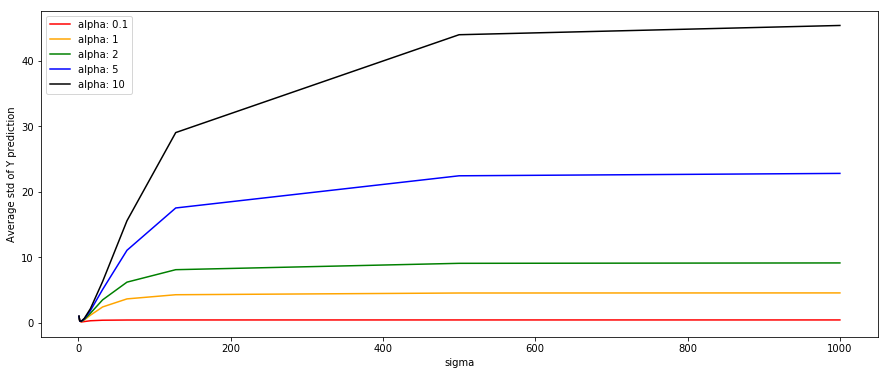

In [47]:
sigmas = [1, 2, 4, 8, 16, 32, 64, 128, 500, 1000]
sigmas_of_prediction = []

alphas_sqr = [0.1, 1, 2, 5, 10]
colores = ['red', 'orange', 'green', 'blue', 'black']

plt.figure(figsize=(15,6))

for i in range(len(alphas_sqr)):
    a = alphas_sqr[i]

    sigmas_of_prediction = []

    for s in sigmas:
        M_s, big_sigma_s = bayesian_regression(Phi_astro, y_norm, alpha_sqr=a, sigma_sqr=s**2)
        mean_deviation = np.mean(np.diag(big_sigma_s))
        sigmas_of_prediction.append(mean_deviation)
    

    plt.plot(sigmas, sigmas_of_prediction, color=colores[i], label=f'alpha: {a}')


plt.xlabel('sigma')
plt.ylabel('Average std of Y prediction')

plt.legend()
plt.show()

A medida que alpha aumenta, la curva se desplaza hacia arriba. Esto quiere decir que, si se asume una mayor varianza del vector de parámetros W (i.e. alpha), entonces la predicción de Y será una distribución de mayor varianza.

Por el contrario, si la varianza de W se setea baja, el modelo tiende a ser smooth, y por lo tanto, la predicción de Y se convierte en una distribución de menor varianza. En el caso en que sigma se asume cercano a 0, entonces la diferencia entre los alphas se vuelve nula.

**¿Cuáles son los parámetros óptimos?**

Si nos ponemos en el caso en el que el modelo debe predecir el valor de Y, podemos imaginar que siempre eligirá el valor más probable. Dado esto, los parámetros que influyen en la varianza de la distribución de Y, no pueden calificarse como buenos o malos desde este punto de vista, ya que en este caso práctico, solo nos interesaría la media de Y, y no que tan seguro se siente el algoritmo.

El valor de Big_Sigma, representa la confianza que tiene el algoritmo sobre si mismo, por lo tanto, el valor óptimo debe encontrarse de acuerdo a las necesidades del contexto.

Dicho con otras palabras, si un modelo A, que tiene poca seguridad de si mismo, compite contra un modelo B, que está muy seguro de si mismo, se observará que harán las mismas predicciones, y por lo tanto empatarán, ya que la predicción solo depende de la media de Y, y no de su varianza.

